Now analysis of parsed data from part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
d = pd.read_csv('AAA_Dm_data.csv')

In [114]:
d.head()   # check our data

,Case,structure,metric,AAA,Dm
0,Case1,PTV CHEST,D2%,70.006151,69.599396
1,Case1,PTV CHEST,D5%,69.602983,69.044564
2,Case1,PTV CHEST,D50%,65.560826,65.457641
3,Case1,PTV CHEST,D95%,57.272270,56.747946
4,Case1,PTV CHEST,D99%,55.580473,54.672556


Looks good, lets query the data

In [118]:
d.describe()

,AAA,Dm
count,1836.000000,1836.000000
mean,20.809326,20.886484
std,39.926160,39.400621
min,0.000000,0.000000
25%,0.035318,0.057313
50%,3.031659,3.111328
75%,25.506982,26.411035
max,771.934406,730.475568


In [115]:
data2 =  d[d['structure']  == 'PTV CHEST'].groupby(['metric'])
data2.mean()

,AAA,Dm
metric,,
D0.1CC,72.499319,73.277080
D1CC,69.849381,70.441142
D2%,71.605874,72.328180
D5%,70.524134,71.159526
D50%,63.821273,64.063104
D95%,56.771258,56.179975
D99%,55.099994,54.223367
DHI,0.249627,0.272696
DMAX,73.865929,75.007929


Helper function for get data

The mean is 64.06310426714285


/Users/robincole/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


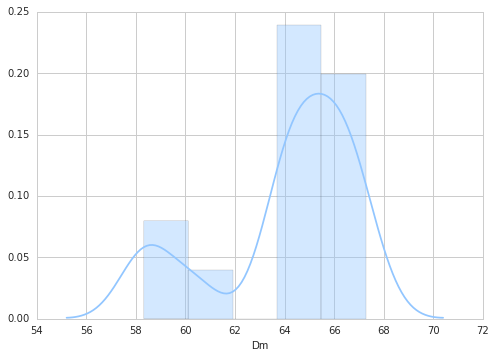

In [120]:
def query_data(Algo, structure, metric):   # helper function to get data
    temp = d[Algo][(d['structure'] == structure) & (d['metric'] == metric)]
    print('The mean is ' + str(temp.mean()))
    #temp.hist()
    return temp

ax2 = sns.distplot(query_data('Dm', 'PTV CHEST', 'D50%'))   # quick test

Get code for BA plot from http://stackoverflow.com/questions/16399279/bland-altman-plot-in-python

For visualisation https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html

In [116]:
def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.xlabel('Dose (Gy)')
    plt.ylabel('Difference (%)')

The mean is 63.821273039285714
The mean is 64.06310426714285


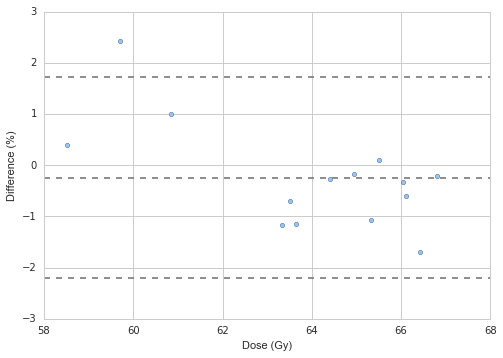

In [121]:
bland_altman_plot(query_data('AAA', 'PTV CHEST', 'D50%'), query_data('Dm', 'PTV CHEST', 'D50%'))
plt.show()

In [80]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

/Users/robincole/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


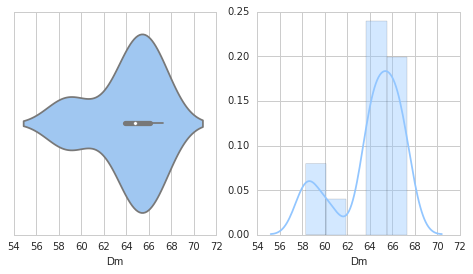

In [106]:
fig = plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
ax = sns.violinplot(x=query_data('Dm', 'PTV CHEST', 'D50%'))  

plt.subplot(1, 2, 2)
ax2 = sns.distplot(query_data('Dm', 'PTV CHEST', 'D50%'))

In [107]:
ax = sns.violinplot(x="metric", y="Diff%", data=d)

ValueError: array must not contain infs or NaNs

In [ ]:
sns.violinplot(x="metric", y="Difference (%)", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

In [ ]:
ax = sns.violinplot(x=tips["total_bill"])